In [4]:
# Graph
num_nodes = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]
graph_layout = {0: [-1, 0], 1: [0, 1], 2: [1, 0], 3: [0, -1]}

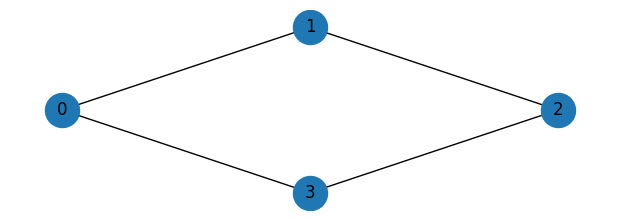

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Imprime un grafo dirigido pesado
# Entrada
#     graph_nodes: Lista de nodos del grafo
#     graph_edges: Diccionario {vértice: peso} donde vértice es (n1, n2)
#     layout:      Para especificar la posición de los nodos
def print_graph(graph_nodes, graph_edges, layout=None):
    G = nx.Graph()

    # Nodes
    G.add_nodes_from(graph_nodes)

    # Edges
    for pair in graph_edges:
        G.add_edge(pair[0], pair[1])

    # Print graph
    if layout is None:
        layout = nx.spring_layout(G)

    plt.figure(3, figsize=(6, 2))
    nx.draw(G, layout, with_labels=True, node_size=600)

print_graph(range(num_nodes), edges, layout=graph_layout)

In [10]:
from dimod import BinaryQuadraticModel
# Initialize model
bqm = BinaryQuadraticModel("SPIN")

In [11]:
# Cost function
for e in range(len(edges)):
    i, j = edges[e]
    bqm.add_quadratic(i, j, 1)

In [12]:
from dwave.system import DWaveSampler, EmbeddingComposite
# Execute program
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=1024)
print(sampleset)

   0  1  2  3 energy num_oc. chain_.
0 +1 -1 +1 -1   -4.0     546     0.0
1 -1 +1 -1 +1   -4.0     477     0.0
2 +1 -1 -1 -1    0.0       1     0.0
['SPIN', 3 rows, 1024 samples, 4 variables]
